# Adding Geo-demographic variables to the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from shapely import geometry

## Load data

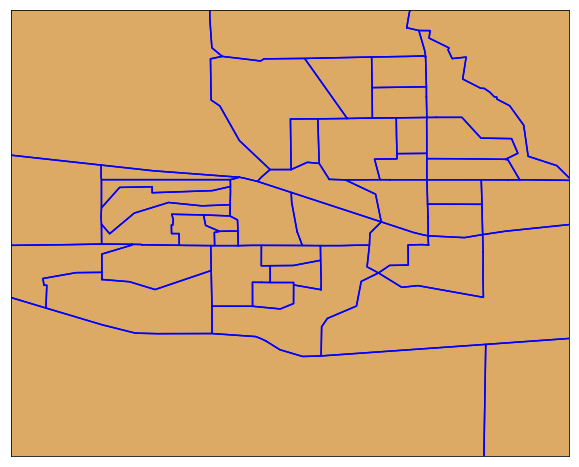

In [2]:
# Load Shapefile

plt.figure(figsize=(10,10))

# Focus map on Ames, Iowa
iowa_map = Basemap(llcrnrlon=-93.695000, llcrnrlat=41.985000, urcrnrlon=-93.5950000, urcrnrlat=42.065000)

iowa_map.fillcontinents(color='#ddaa66',lake_color='aqua')

# Iowa shapefile
iowa_map.readshapefile('../data/input/shapefiles/gz_2010_19_150_00_500k', 'iowa', drawbounds=False)

# Map census block groups
for info, shape in zip(iowa_map.iowa_info, iowa_map.iowa):
    # Ames, Iowa is in Story county
    if info['COUNTY'] == '169':
        x, y = zip(*shape)
        iowa_map.plot(x, y, marker=None,color='b')

# Map a point
#iowa_map.plot(-93.617881, 42.053875, marker='D',color='m')

plt.show()

In [3]:
# Load original AmesHousing dataset
ames_df = pd.read_csv('../data/input/AmesHousing_with_latlon.csv')
ames_df.set_index('Id', inplace=True)

print('Rows:', len(ames_df))
ames_df.head()

Rows: 2930


,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Longitude,Latitude
Id,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [3]:
# Load training dataset
train_df = pd.read_csv('../data/input/train_with_latlon.csv')
train_df.set_index('Id', inplace=True)
train_df.drop(['Order', 'PID'], axis=1, inplace=True)

print('Rows:', len(train_df))
train_df.head()

Rows: 1460


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Longitude,Latitude
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,-93.686931,42.013952
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,-93.645544,42.042961
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,-93.688950,42.015949
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,-93.644307,42.017609
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,-93.653324,42.055748


In [4]:
# Load test dataset
test_df = pd.read_csv('../data/input/test_with_latlon.csv')
test_df.set_index('Id', inplace=True)
test_df.drop(['Order', 'PID'], axis=1, inplace=True)

print('Rows:', len(test_df))
test_df.head()

Rows: 1459


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Longitude,Latitude
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,-93.619756,42.053014
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,-93.619387,42.052659
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,-93.638933,42.060899
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2010,WD,Normal,-93.638925,42.060779
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,NaN,NaN,NaN,0,1,2010,WD,Normal,-93.633826,42.060728


## Assign each house to a census block group

In [5]:
def assign_to_census_blkgrp(df):
    census_blk = list()

    for info, shape in zip(iowa_map.iowa_info, iowa_map.iowa):
        # Ames, Iowa is in Story county
        if info['COUNTY'] == '169':
            polygon = geometry.Polygon(shape)
            for house in df.iterrows():
                if polygon.contains(geometry.Point(house[1]['Longitude'], house[1]['Latitude'])):
                    census_blk.append((house[0], info['COUNTY'], info['TRACT'], info['BLKGRP']))
                    
    return census_blk

### Original AmesHousing dataset

In [6]:
census_blk = assign_to_census_blkgrp(ames_df)

census_df = pd.DataFrame(census_blk, columns=['Id', 'county', 'tract', 'blkgrp'])
census_df.set_index('Id', inplace=True)
census_df.head()

,county,tract,blkgrp
Id,,,
564,169,000100,5
1156,169,000100,5
1183,169,000100,5
1184,169,000100,5
1828,169,000100,5


In [7]:
# Join and output
ames_df = ames_df.join(census_df)
print('Rows with missing census block group:', ames_df['blkgrp'].isnull().sum())
#train_df.to_csv('../data/intermediate/train_with_censusblk.csv')

Rows with missing census block group: 18


### Training set

In [6]:
census_blk = assign_to_census_blkgrp(train_df)

census_df = pd.DataFrame(census_blk, columns=['Id', 'county', 'tract', 'blkgrp'])
census_df.set_index('Id', inplace=True)
census_df.head()

,county,tract,blkgrp
Id,,,
54,169,000100,5
1254,169,000100,5
17,169,000300,2
141,169,000300,2
192,169,000300,2


In [7]:
# Join and output
train_df = train_df.join(census_df)
print('Rows with missing census block group:', train_df['blkgrp'].isnull().sum())
#train_df.to_csv('../data/intermediate/train_with_censusblk.csv')

Rows with missing census block group: 9


### Test set

In [8]:
census_blk = assign_to_census_blkgrp(test_df)

census_df = pd.DataFrame(census_blk, columns=['Id', 'county', 'tract', 'blkgrp'])
census_df.set_index('Id', inplace=True)
census_df.head()

,county,tract,blkgrp
Id,,,
1737,169,000100,5
2022,169,000100,5
2040,169,000100,5
2041,169,000100,5
2362,169,000100,5


In [9]:
# Join and output
test_df = test_df.join(census_df)
print('Rows with missing census block group:', test_df['blkgrp'].isnull().sum())
#test_df.to_csv('../data/intermediate/test_with_censusblk.csv')

Rows with missing census block group: 8


## Add Geo demos

In [9]:
geo_demos = pd.read_csv('../data/input/geodemo/geodemodata - Block Groups.csv', dtype={'ID': object})
geo_demos.head()

,ID,GEO_NAME,HIMEDBYX,HIAVGBYX,INCPHMBYX,VACANTHUBY,POPDENBY,CAPINCBY,HHCHG2KBY,POPCH2KBY,...,P6064BYX,P6569BYX,P7074BYX,P7579BYX,P8084BYX,P85PBYX,POPBY,HHBY,LON,LAT
0,191690001001,NaN,65805.451613,80939.800000,30101.578512,24.0,100.470883,30101.578512,0.095335,0.069219,...,0.042011,0.033747,0.022727,0.012397,0.008953,0.006198,1452.0,540.0,-93.645302,42.100712
1,191690001002,NaN,92967.750000,112187.199669,43554.181409,36.0,1090.274992,43554.181409,1.414000,1.519417,...,0.058767,0.044637,0.043995,0.034361,0.023121,0.011240,3114.0,1207.0,-93.642471,42.060936
2,191690001003,NaN,59582.333333,73997.599034,28261.075646,31.0,54.955660,28261.075646,0.098143,0.084000,...,0.096863,0.062731,0.033210,0.026753,0.005535,0.006458,1084.0,414.0,-93.593178,42.082787
3,191690001004,NaN,58836.209302,73685.700000,30199.057377,37.0,14.603616,30199.057377,0.038576,0.010297,...,0.067950,0.039638,0.030578,0.016988,0.009060,0.010193,883.0,350.0,-93.542473,42.033436
4,191690001005,NaN,106930.818182,140236.199475,50169.006573,10.0,133.581170,50169.006573,0.107558,0.034985,...,0.084507,0.051643,0.030986,0.017840,0.009390,0.008451,1065.0,381.0,-93.673813,42.065639


In [10]:
# Parse Id, for county, tract, and block group codes
geo_demos['county'] = geo_demos['ID'].str.slice(2,5)
geo_demos['tract'] = geo_demos['ID'].str.slice(5,11)
geo_demos['blkgrp'] = geo_demos['ID'].str.slice(11,12)
geo_demos.drop(['ID', 'GEO_NAME', 'LON', 'LAT'], axis=1, inplace=True)

# Merge geo demos with datasets
ames_df.reset_index(inplace=True)
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
ames_df = ames_df.merge(geo_demos, how='left', on=['county', 'tract', 'blkgrp'])
train_df = train_df.merge(geo_demos, how='left', on=['county', 'tract', 'blkgrp'])
test_df = test_df.merge(geo_demos, how='left', on=['county', 'tract', 'blkgrp'])

# Output files with geodemos
ames_df.to_csv('../data/intermediate/AmesHousing_with_geodemo.csv', index=False)
train_df.to_csv('../data/intermediate/train_with_geodemo.csv', index=False)
test_df.to_csv('../data/intermediate/test_with_geodemo.csv', index=False)

# Explore Geo demos

In [11]:
import seaborn as sns
import random

In [12]:
ames_df = pd.read_csv('../data/intermediate/AmesHousing_with_geodemo.csv')
train_df = pd.read_csv('../data/intermediate/train_with_geodemo.csv')
test_df = pd.read_csv('../data/intermediate/test_with_geodemo.csv')

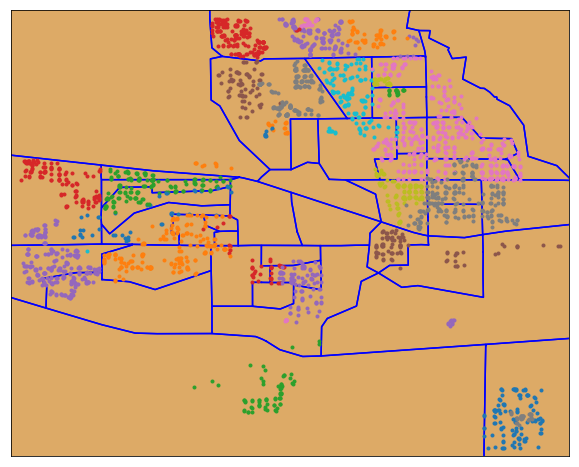

In [19]:
plt.figure(figsize=(10,10))

# Focus map on Ames, Iowa
iowa_map = Basemap(llcrnrlon=-93.695000, llcrnrlat=41.985000, urcrnrlon=-93.5950000, urcrnrlat=42.065000)

iowa_map.fillcontinents(color='#ddaa66',lake_color='aqua')

# Iowa shapefile
iowa_map.readshapefile('../data/input/shapefiles/gz_2010_19_150_00_500k', 'iowa', drawbounds=False)

# Map census block groups
for info, shape in zip(iowa_map.iowa_info, iowa_map.iowa):
    # Ames, Iowa is in Story county
    if info['COUNTY'] == '169':
        x, y = zip(*shape)
        iowa_map.plot(x, y, marker=None,color='b')

# Map a point
neighborhoods = ames_df.Neighborhood.unique().tolist()
random.shuffle(neighborhoods)
colors = sns.color_palette(n_colors=28)

for row in ames_df[['Neighborhood', 'Longitude', 'Latitude']].iterrows():
    neighborhood, lon, lat = row[1]['Neighborhood'], row[1]['Longitude'], row[1]['Latitude']
    iowa_map.plot(lon, lat, marker='.',color=colors[neighborhoods.index(neighborhood)])

plt.show()

['Greens', 'StoneBr', 'Timber', 'SWISU', 'CollgCr', 'GrnHill', 'Blueste', 'OldTown', 'BrkSide', 'Landmrk', 'ClearCr', 'Edwards', 'Sawyer', 'SawyerW', 'Gilbert', 'IDOTRR', 'Blmngtn', 'Somerst', 'BrDale', 'NWAmes', 'Mitchel', 'Veenker', 'NPkVill', 'NridgHt', 'Crawfor', 'NoRidge', 'NAmes', 'MeadowV']


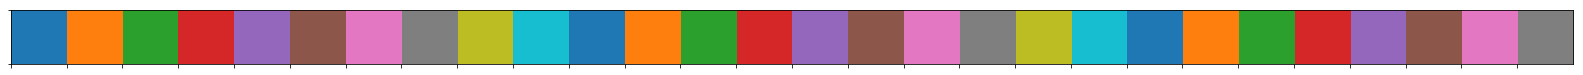

In [20]:
print(neighborhoods)
sns.palplot(sns.color_palette(n_colors=28))
plt.show()

In [21]:
ames_df.groupby(['Neighborhood', 'tract', 'blkgrp'])['Id'].agg('count').to_csv('../data/output/neighborhood to census_blk.csv')
ames_df.groupby(['tract', 'blkgrp', 'Neighborhood'])['Id'].agg('count').to_csv('../data/output/census_blk to neighborhood.csv')

## Plotting

D:\ProgramData\Anaconda3\envs\school\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


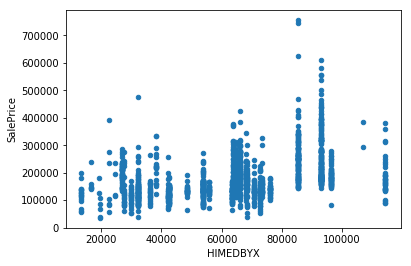

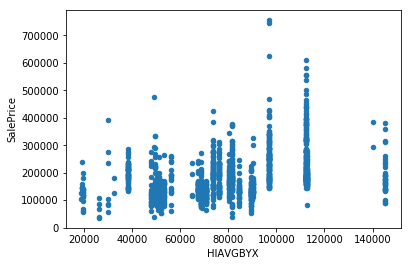

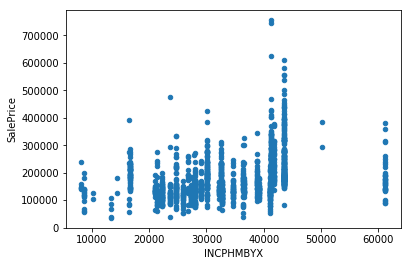

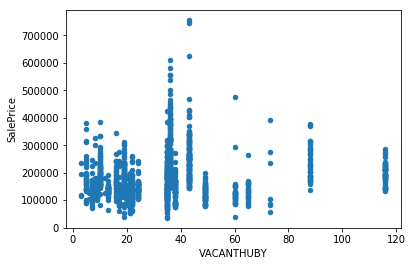

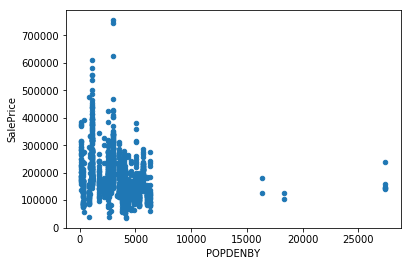

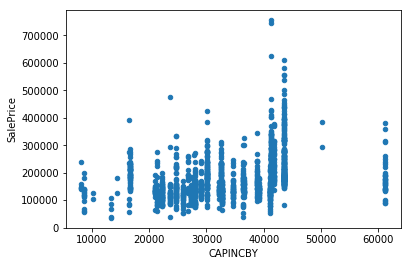

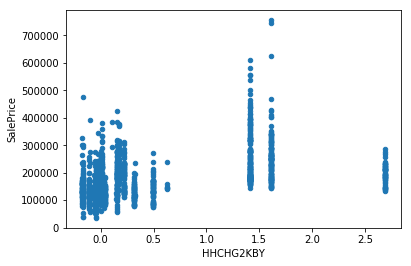

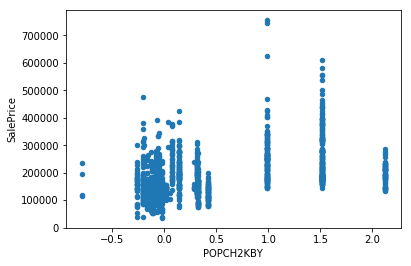

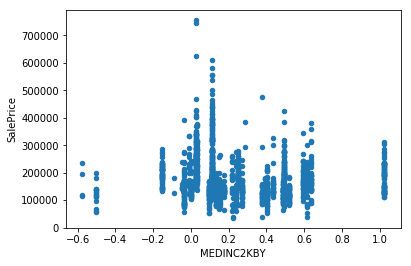

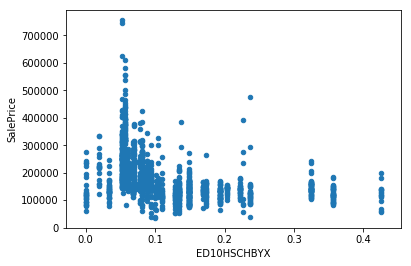

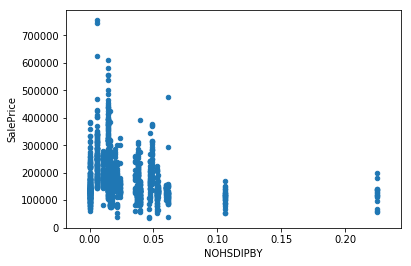

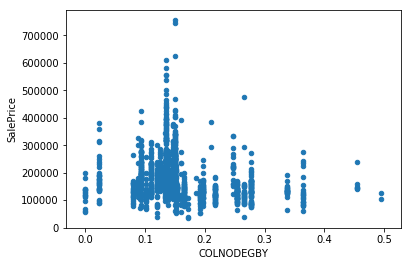

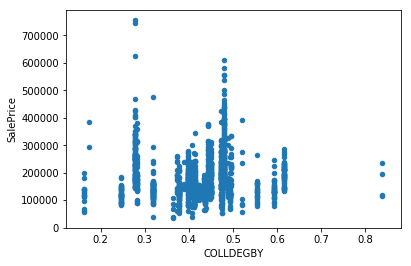

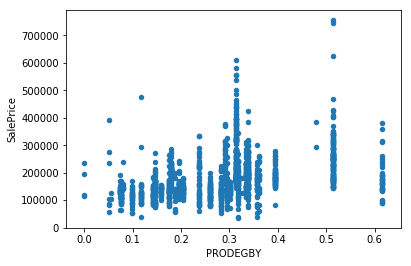

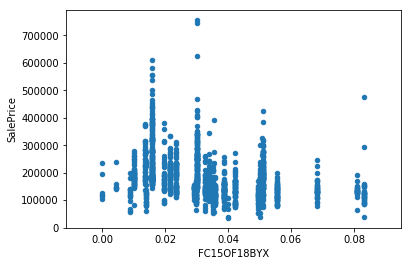

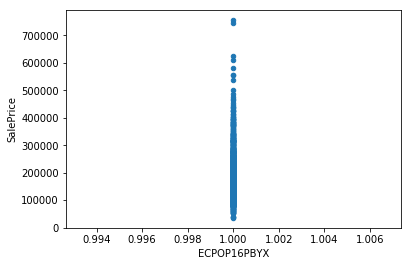

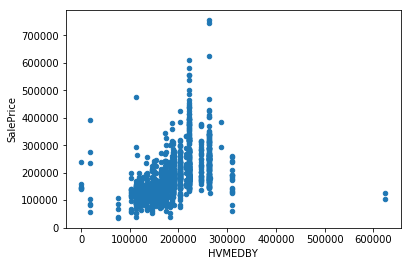

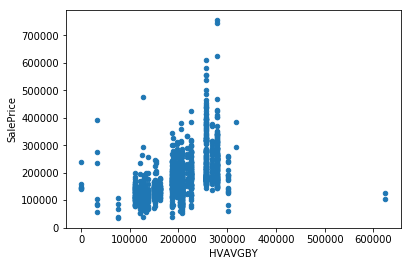

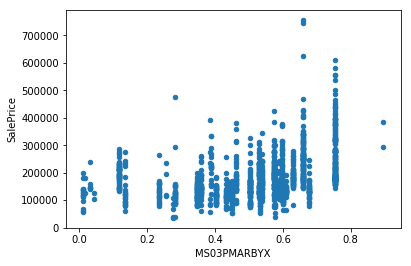

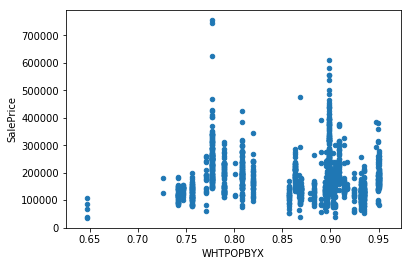

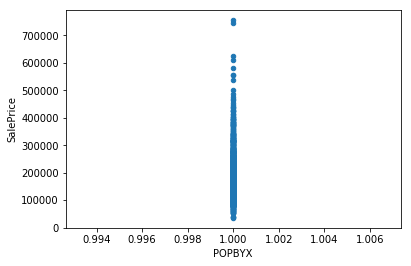

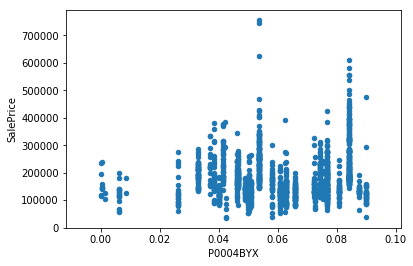

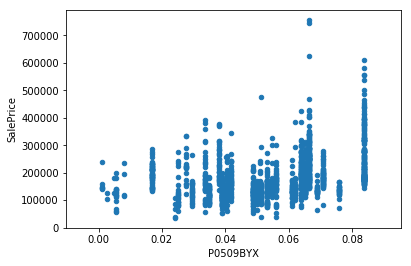

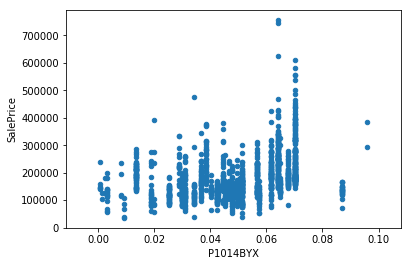

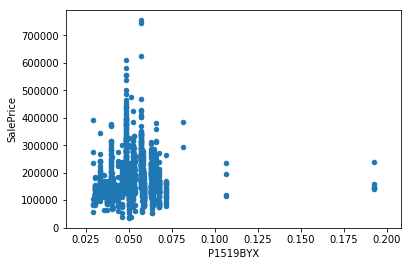

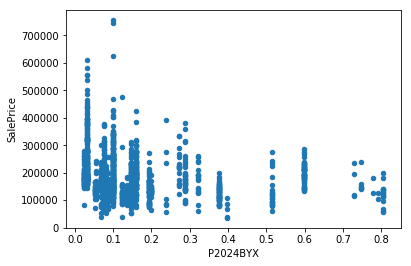

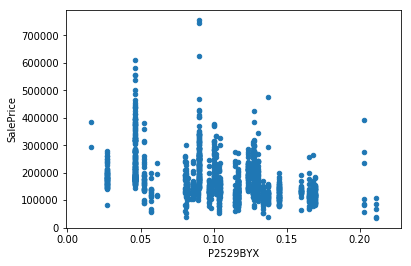

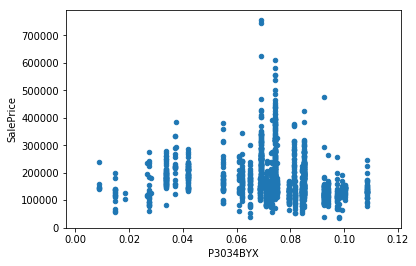

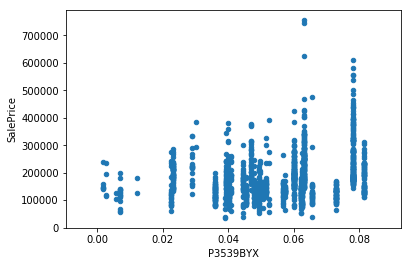

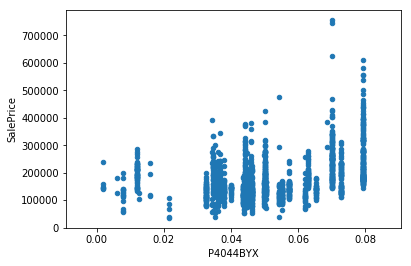

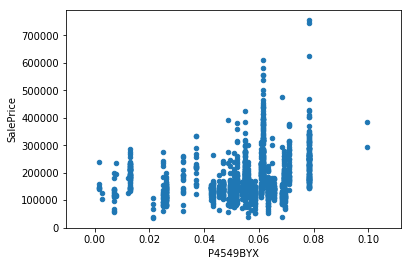

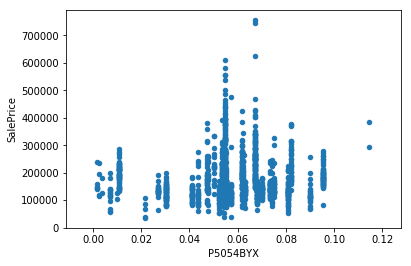

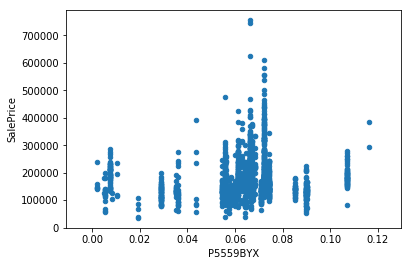

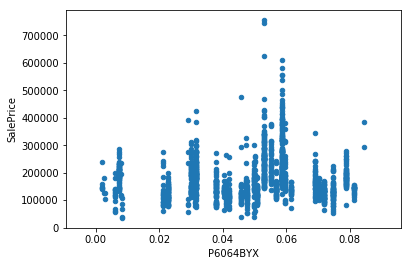

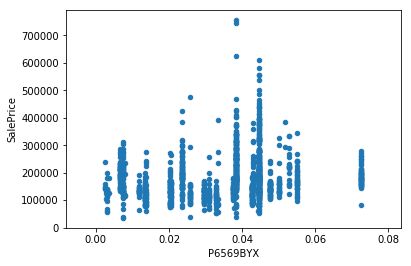

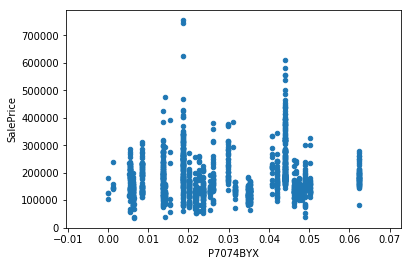

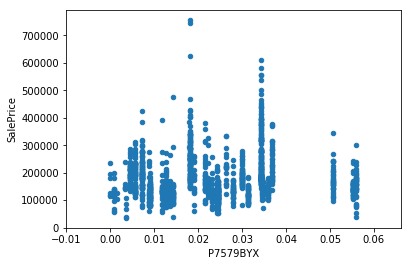

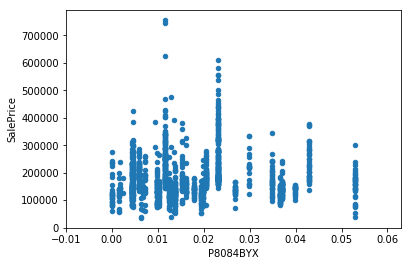

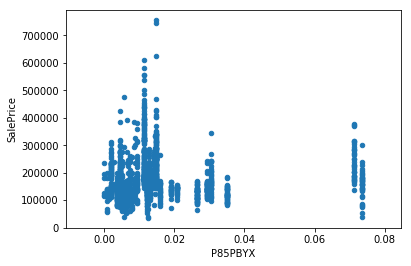

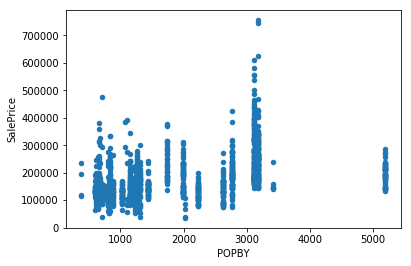

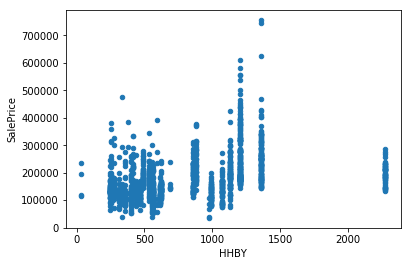

In [135]:
geodemo_cols = ['HIMEDBYX', 'HIAVGBYX', 'INCPHMBYX', 'VACANTHUBY', 'POPDENBY',
       'CAPINCBY', 'HHCHG2KBY', 'POPCH2KBY', 'MEDINC2KBY', 'ED10HSCHBYX',
       'NOHSDIPBY', 'COLNODEGBY', 'COLLDEGBY', 'PRODEGBY', 'FC15OF18BYX',
       'ECPOP16PBYX', 'HVMEDBY', 'HVAVGBY', 'MS03PMARBYX', 'WHTPOPBYX',
       'POPBYX', 'P0004BYX', 'P0509BYX', 'P1014BYX', 'P1519BYX', 'P2024BYX',
       'P2529BYX', 'P3034BYX', 'P3539BYX', 'P4044BYX', 'P4549BYX', 'P5054BYX',
       'P5559BYX', 'P6064BYX', 'P6569BYX', 'P7074BYX', 'P7579BYX', 'P8084BYX',
       'P85PBYX', 'POPBY', 'HHBY']

#sns.pairplot(temp)
for col in geodemo_cols:
    ames_df[[col, 'SalePrice']].plot.scatter(x=col, y='SalePrice')
    #sns.lmplot(col, 'SalePrice', data=train_df, hue='Neighborhood', fit_reg=False)
plt.show()

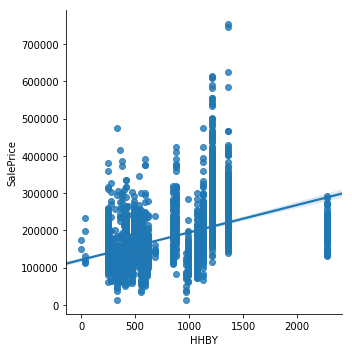

In [22]:
#sns.lmplot('HIMEDBYX', 'SalePrice', data=train_df, hue='Neighborhood', fit_reg=False)
sns.lmplot('HHBY', 'SalePrice', data=ames_df, fit_reg=True)
plt.show()

In [2]:
ames_df = pd.read_csv('../data/intermediate/AmesHousing_with_geodemo.csv')

In [ ]:
ames_df.LotFrontage